In [28]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
import itertools 
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# DEFINING TRAIN AND TEST DIRECTORIES TO READ DATA
train_dir = '../input/dog-breed-identification/train'
test_dir ='../input/dog-breed-identification/test'

In [3]:
traindf = pd.read_csv('../input/dog-breed-identification/labels.csv',dtype=str)
testdf = pd.read_csv('../input/dog-breed-identification/sample_submission.csv',dtype=str)

In [4]:
traindf.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Training data has dog image ids and respective dog breeds.

In [5]:
testdf.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,english_setter,english_springer,entlebucher,eskimo_dog,flat-coated_retriever,french_bulldog,german_shepherd,german_short-haired_pointer,giant_schnauzer,golden_retriever,gordon_setter,great_dane,great_pyrenees,greater_swiss_mountain_dog,groenendael,ibizan_hound,irish_setter,irish_terrier,irish_water_spaniel,irish_wolfhound,italian_greyhound,japanese_spaniel,keeshond,kelpie,kerry_blue_terrier,komondor,kuvasz,labrador_retriever,lakeland_terrier,leonberg,lhasa,malamute,malinois,maltese_dog,mexican_hairless,miniature_pinscher,miniature_poodle,miniature_schnauzer,newfoundland,norfolk_terrier,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333

Test data / sample_submission csv has dog image ids and probabilities towards all breeds.

In [6]:
# FUNCTION TO ADD .jpg EXTENSION IN TRAIN AND TEST DATA
def add_jpg_ex(fn):
    return fn+".jpg"


In [7]:
# MODIFYING ID COLUMN IN TRAIN AND TEST DATA
traindf["id"] = traindf["id"].apply(add_jpg_ex)
testdf["id"] = testdf["id"].apply(add_jpg_ex)

In [8]:
# CHECKING ID COLUMN IN TRAINDS IF .JPG IS ADDED AFTER EVERY ID
traindf.id

0        000bec180eb18c7604dcecc8fe0dba07.jpg
1        001513dfcb2ffafc82cccf4d8bbaba97.jpg
2        001cdf01b096e06d78e9e5112d419397.jpg
3        00214f311d5d2247d5dfe4fe24b2303d.jpg
4        0021f9ceb3235effd7fcde7f7538ed62.jpg
                         ...                 
10217    ffd25009d635cfd16e793503ac5edef0.jpg
10218    ffd3f636f7f379c51ba3648a9ff8254f.jpg
10219    ffe2ca6c940cddfee68fa3cc6c63213f.jpg
10220    ffe5f6d8e2bff356e9482a80a6e29aac.jpg
10221    fff43b07992508bc822f33d8ffd902ae.jpg
Name: id, Length: 10222, dtype: object

In [9]:
# CHECKING ID COLUMN IN TESTDS IF .JPG IS ADDED AFTER EVERY ID
testdf.id

0        000621fb3cbb32d8935728e48679680e.jpg
1        00102ee9d8eb90812350685311fe5890.jpg
2        0012a730dfa437f5f3613fb75efcd4ce.jpg
3        001510bc8570bbeee98c8d80c8a95ec1.jpg
4        001a5f3114548acdefa3d4da05474c2e.jpg
                         ...                 
10352    ffeda8623d4eee33c6d1156a2ecbfcf8.jpg
10353    fff1ec9e6e413275984966f745a313b0.jpg
10354    fff74b59b758bbbf13a5793182a9bbe4.jpg
10355    fff7d50d848e8014ac1e9172dc6762a3.jpg
10356    fffbff22c1f51e3dc80c4bf04089545b.jpg
Name: id, Length: 10357, dtype: object

In [10]:
# CHECKING VALUE COUNTS OF EVERY BREED TYPE
traindf.breed.value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
great_pyrenees                    111
pomeranian                        111
basenji                           110
samoyed                           109
airedale                          107
tibetan_terrier                   107
cairn                             106
leonberg                          106
japanese_spaniel                  105
beagle                            105
australian_terrier                102
miniature_pinscher                102
blenheim_spaniel                  102
irish_wolfhound                   101
lakeland_terrier                   99
saluki                             99
papillon                           96
siberian_husky                     95
whippet                            95
norwegian_elkhound                 95
pug         

In [11]:
# FINDING TOTAL NUMBER OF UNIQUE BREEDS
traindf.breed.describe()

count                  10222
unique                   120
top       scottish_deerhound
freq                     126
Name: breed, dtype: object

120 unique DOG breeds

In [12]:
# DEFINING TARGET BREED CLASSIFIERS
# REQUIREMENT AS PER THE ASSIGNMENT
target_breeds = ['beagle','chihuahua','doberman','french_bulldog', 'golden_retriever', 'malamute','pug','saint_bernard','scottish_deerhound','tibetan_mastiff']

In [13]:
# MODIFYING TRAININIG DATA AS PER THE REQUIREMENT FOR SPECIFIC BREED CLASSIFIERS
traindf = traindf.loc[traindf['breed'].isin(target_breeds)]

In [14]:
traindf.breed.describe()

count                    841
unique                    10
top       scottish_deerhound
freq                     126
Name: breed, dtype: object

WE HAVE 841 IMAGES TO TRAIN THE MODEL FOR SPECIFIC 10 BREED CLASSIFIERS.

# **DATA PREPROCESSING**

In [15]:
# PREPROCESSING TRAINING DATA
# GENERATING TRAINING IMAGE DATA USING KERAS IMAGE DATA GENERATOR
train_datagen=ImageDataGenerator( rescale=1./255.,
                                  zoom_range = [0.7,1],
                                  horizontal_flip = True,
                                  #Setting validation split to 6% 
                                  validation_split=0.06 
                                  )
                                    
# DEFINIG BATCH SIZE                                  
BATCH_SIZE = 32

# DEFINING X AND Y AS ID AND BREED COLUMNS FROM TRAINING CSV DATA
train_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="training",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224),
color_mode="rgb" 
)

Found 791 validated image filenames belonging to 10 classes.


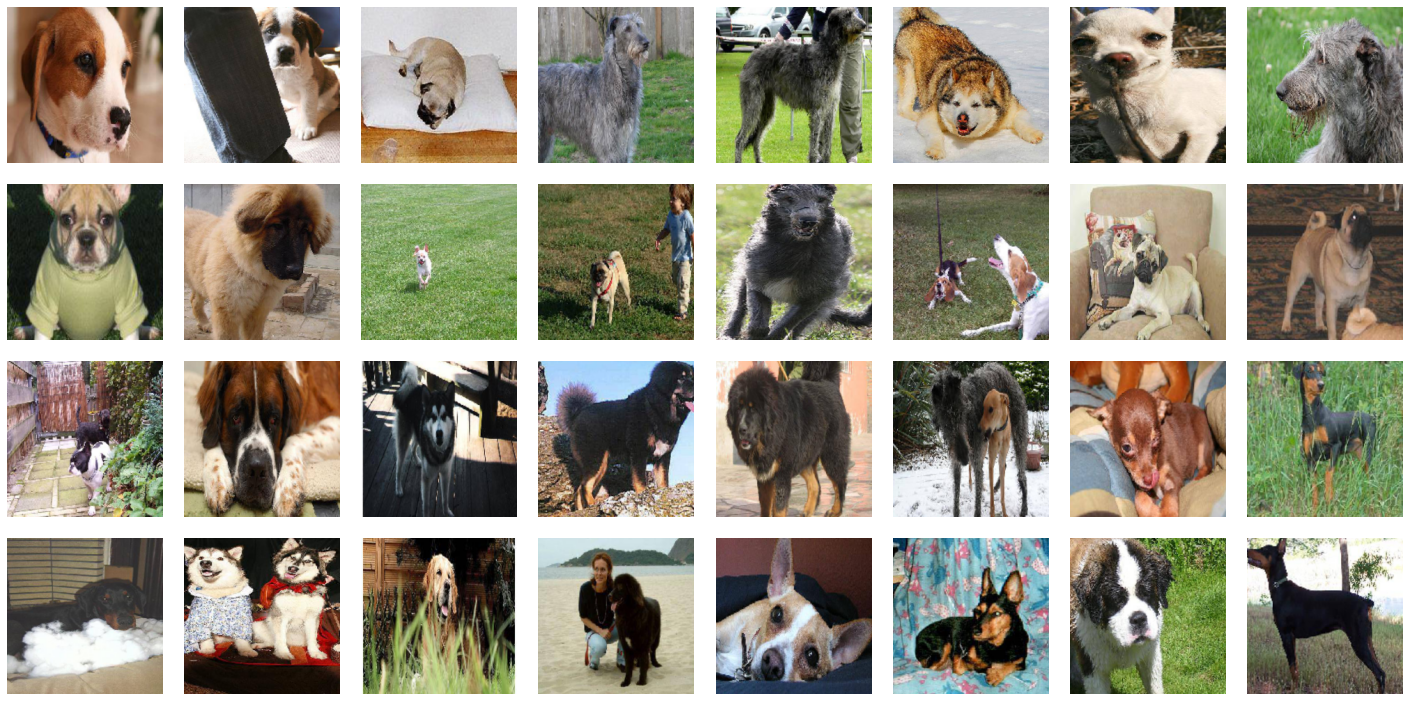

In [16]:
# PLOTTING TRAINING IMAGES
x,y = next(train_generator)

def show_grid(image_list,nrows,ncols,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        
        
        
show_grid(x,4,8,figsize=(25,25))

In [17]:
# CHECKING SHAPE AND TYPE OF X TRAIN AND Y TRAIN
print(type(x))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
(32, 224, 224, 3)
(32, 10)


In [18]:
# PREPROCESSING VALIDATION DATA
valid_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="validation",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224),
color_mode="rgb")

Found 50 validated image filenames belonging to 10 classes.


We have 50 images for validation on 10 target dog breeds

In [19]:
# PRE PROCESSING TEST DATA
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory=test_dir,
x_col="id",
y_col=None,
batch_size=BATCH_SIZE,
seed=42,
shuffle=False,
class_mode=None,
target_size=(224,224),
color_mode="rgb")

Found 10357 validated image filenames.


FOR TEST DATA WE HAVE 10357 IMAGES WITH IDs TO PREDICT.

# INITITAING SEQUENTIAL MODEL ON RESNET50 ARCHITECTURE

In [22]:
pretrained_model = tf.keras.applications.ResNet50V2(
        weights='imagenet',
        include_top=False ,
        input_shape=[224,224,3]
    )
pretrained_model.trainable = False
    
model = tf.keras.Sequential([
    pretrained_model,   
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    
# WE HAVE NOT MADE ANY CHANGES IN THE SEQUENTIAL MODEL EXCEPT FOR THE LAST LAYER AS DENSE LAYER WITH SOFTMAX ACTIVATION FUNCTION.

In [23]:
# USING STOCHASTIC GRADIENT DESCENT OPTIMIZER
opt=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)
model.compile(optimizer = opt ,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [24]:
# USING EARLY STOPPING TO STOP THE MODEL IF IT TAKES TOO MUCH TIME IN TRAINING
early = tf.keras.callbacks.EarlyStopping( patience=2,
                                          min_delta=0.001,
                                          restore_best_weights=True)

# FITTING THE MODEL

In [29]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30,
                    callbacks=[early],)

Epoch 1/30
24/24 [==============================] - 11s 474ms/step - loss: 0.2304 - accuracy: 0.9526 - val_loss: 0.1565 - val_accuracy: 1.0000
Epoch 2/30
24/24 [==============================] - 11s 463ms/step - loss: 0.2154 - accuracy: 0.9578 - val_loss: 0.1536 - val_accuracy: 1.0000
Epoch 3/30
24/24 [==============================] - 12s 488ms/step - loss: 0.2097 - accuracy: 0.9578 - val_loss: 0.1656 - val_accuracy: 1.0000
Epoch 4/30
24/24 [==============================] - 11s 465ms/step - loss: 0.2077 - accuracy: 0.9539 - val_loss: 0.1904 - val_accuracy: 0.9688


# VISUALIZING LOSS AND ACCURACY CURVES

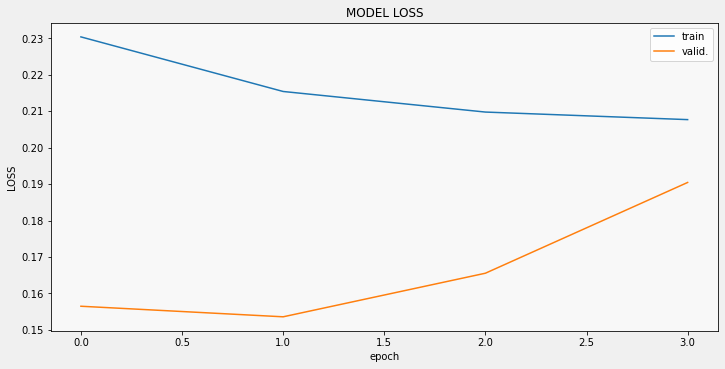

In [30]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])
    
    
    
    
    
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)

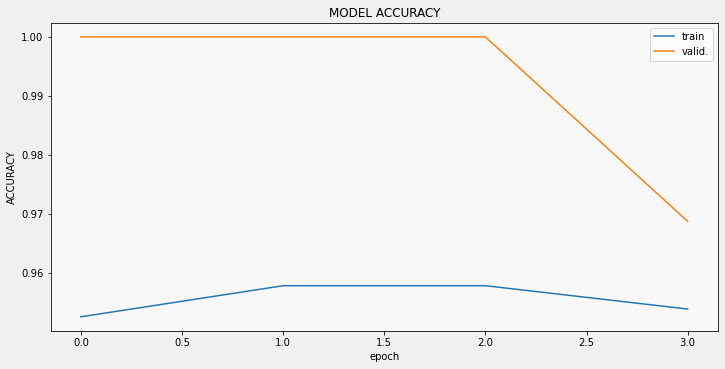

In [31]:
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    211,
)

In [32]:
score = model.evaluate(valid_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

2/2 [==============================] - 1s 450ms/step - loss: 0.2019 - accuracy: 0.9800
Accuracy: 98.00%
Loss:  0.20186728239059448


In [33]:
from sklearn.metrics import f1_score, confusion_matrix

Normalized confusion matrix


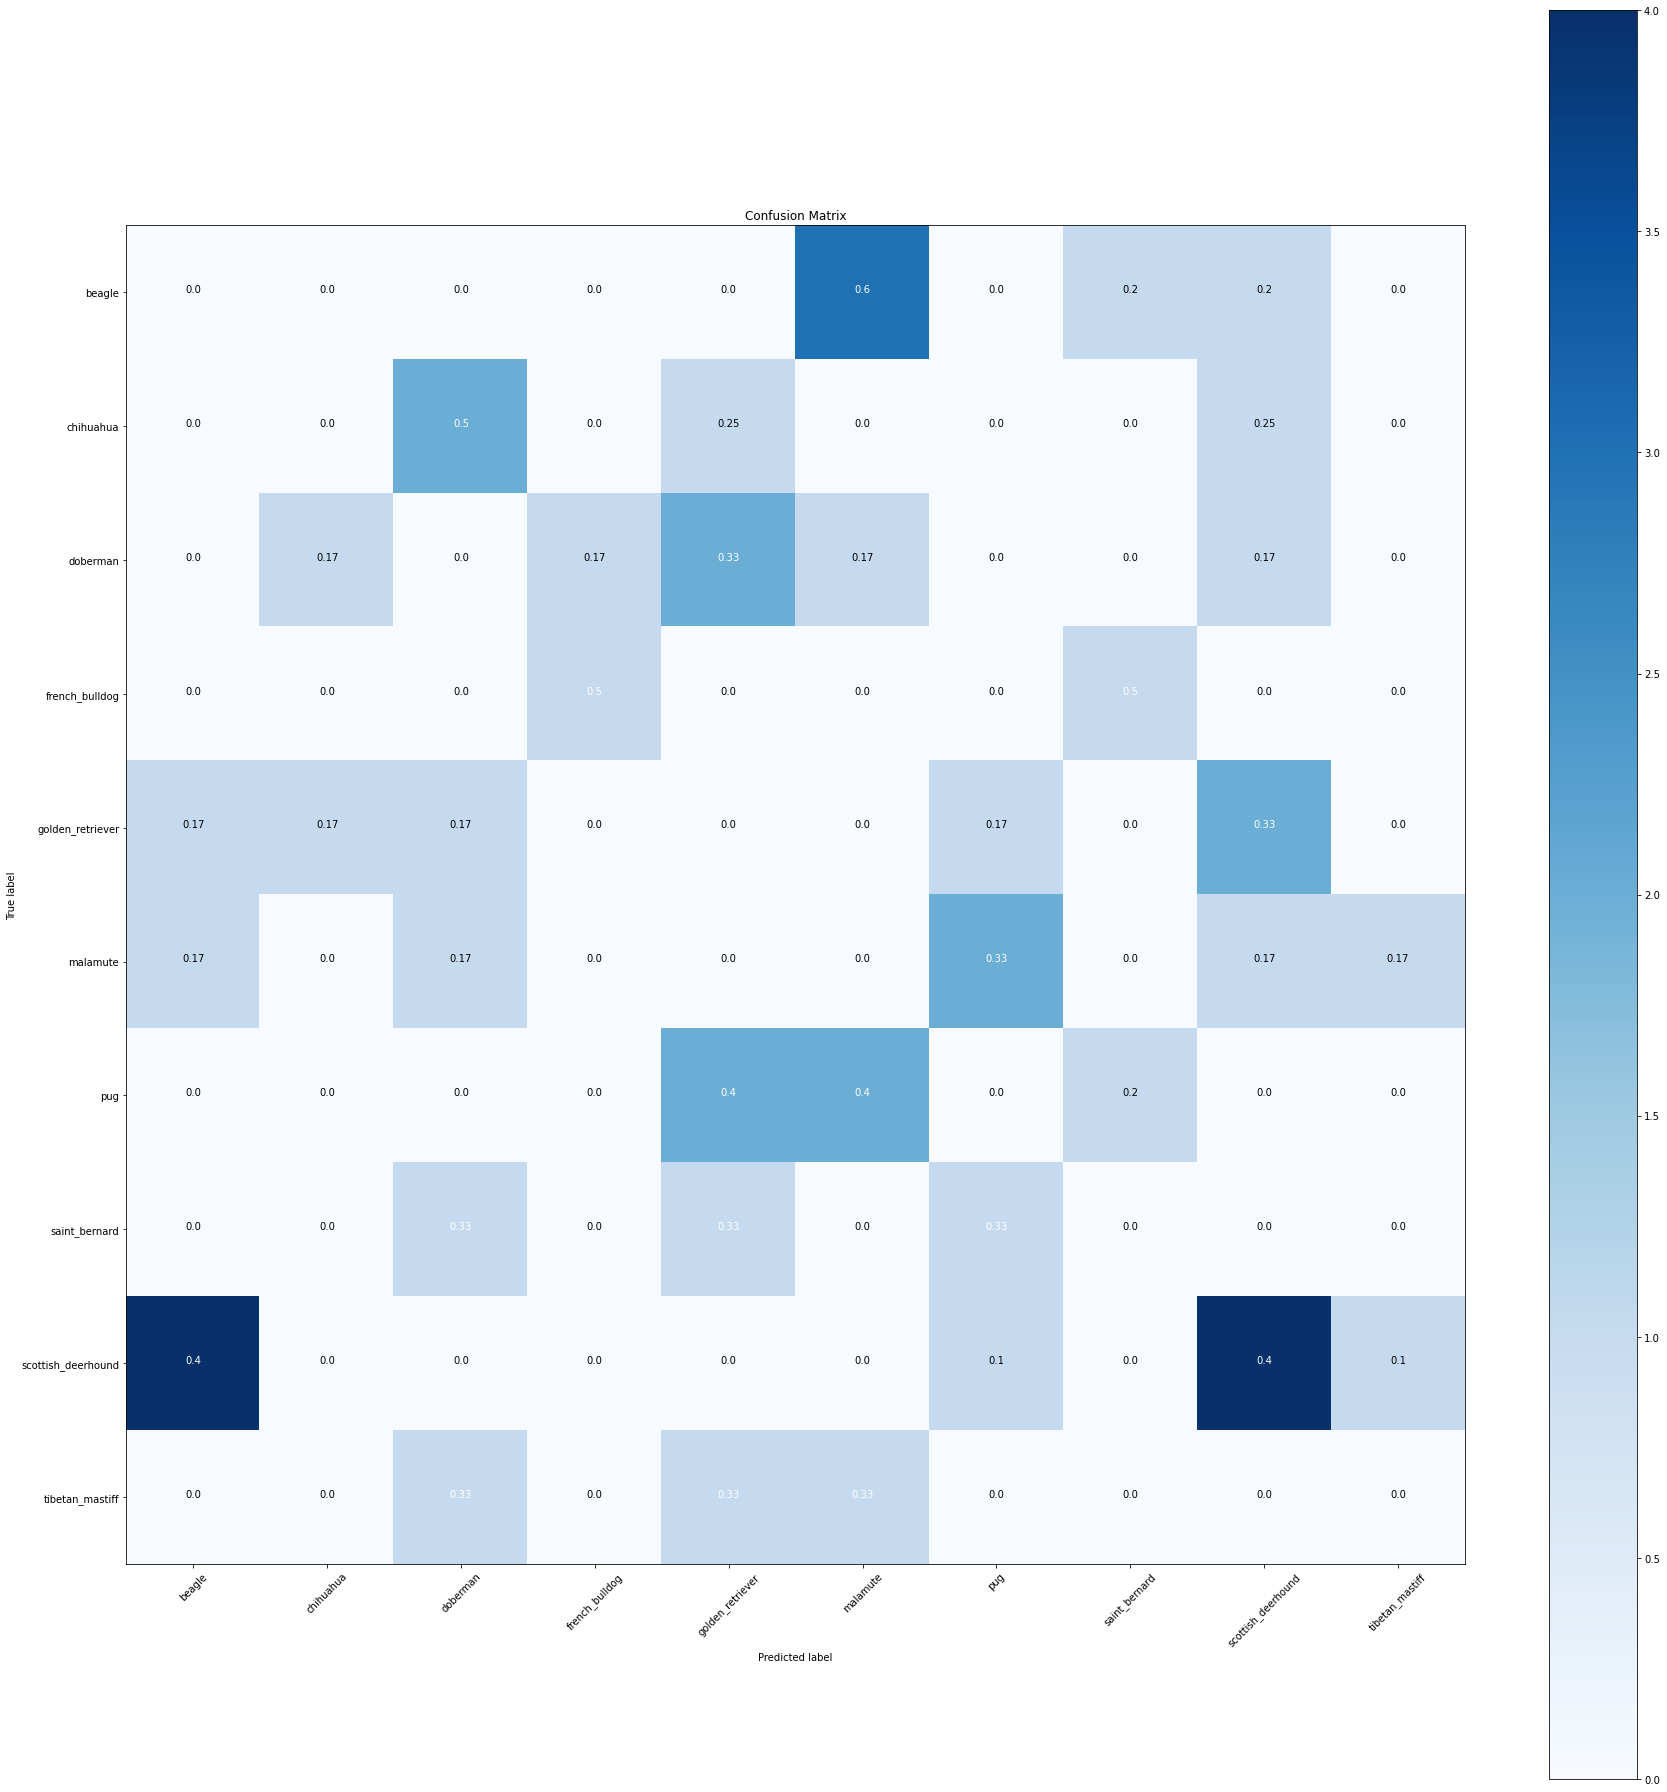

In [39]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(25,25))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
    
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(valid_generator.classes,y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [40]:
f_score = f1_score(valid_generator.classes,y_pred,average='macro')
print('F1 score:',f_score)


F1 score: 0.09000000000000001


# PREDICTING TEST IMAGES

In [41]:
# PREDICTING TEST IMAGES FOR ALL THE 10 BREEDS
pred=model.predict(test_generator)
preddf=pd.DataFrame(pred,columns=target_breeds)

In [42]:
preddf

,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
0,0.043900,0.119535,0.000758,0.120564,0.041639,0.025139,0.593607,0.026642,0.005517,0.022698
1,0.012535,0.059169,0.030987,0.010567,0.014593,0.201368,0.033906,0.006590,0.122282,0.508004
2,0.020075,0.036408,0.034400,0.009169,0.272886,0.021318,0.028692,0.116360,0.358882,0.101811
3,0.005363,0.001189,0.111520,0.006483,0.008155,0.009623,0.274802,0.024079,0.279694,0.279091
4,0.029742,0.005484,0.002748,0.023308,0.010023,0.006523,0.816510,0.006799,0.036142,0.062721
...,...,...,...,...,...,...,...,...,...,...
10352,0.129598,0.012552,0.062769,0.046396,0.438960,0.090509,0.028015,0.050000,0.080641,0.060560
10353,0.073260,0.046042,0.121599,0.011006,0.019410,0.004021,0.586563,0.006783,0.099393,0.031923
10354,0.003293,0.874500,0.029828,0.002943,0.028049,0.004841,0.021835,0.002194,0.019060,0.013458
10355,0.048581,0.006606,0.010155,0.207483,0.054204,0.016575,0.557822,0.024006,0.025104,0.049464


In [43]:
file_list = test_generator.filenames
id_list = []
for name in file_list:
    m = re.sub('test/', '', name)
    m = re.sub('.jpg', '', m)
    id_list.append(m)

In [44]:
preddf['id']=id_list
final_df = preddf.set_index('id')

In [45]:
print('Breeds and Prediction score')
final_df.head()


Breeds and Prediction score


,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
id,,,,,,,,,,
000621fb3cbb32d8935728e48679680e,0.043900,0.119535,0.000758,0.120564,0.041639,0.025139,0.593607,0.026642,0.005517,0.022698
00102ee9d8eb90812350685311fe5890,0.012535,0.059169,0.030987,0.010567,0.014593,0.201368,0.033906,0.006590,0.122282,0.508004
0012a730dfa437f5f3613fb75efcd4ce,0.020075,0.036408,0.034400,0.009169,0.272886,0.021318,0.028692,0.116360,0.358882,0.101811
001510bc8570bbeee98c8d80c8a95ec1,0.005363,0.001189,0.111520,0.006483,0.008155,0.009623,0.274802,0.024079,0.279694,0.279091
001a5f3114548acdefa3d4da05474c2e,0.029742,0.005484,0.002748,0.023308,0.010023,0.006523,0.816510,0.006799,0.036142,0.062721
